## Connect to ICW:

In [204]:
import cadspy

In [205]:
username = str(input('User number'))
icw = cadspy.DatabaseConnection(system='ICW', user=username)

User number u243700
Enter Password:  ··············


<br>
<div class="alert alert-" style = "border-radius:10px;border-width:3px;border-color:salmon;font-family:Verdana,sans-serif;font-size:16px;">

<font size="4">Can't connect to ICW? Instructions on how to get access to it in the links below:

</font>
</div>

- Step 1: [Requesting Access to GitHub](https://baplc.sharepoint.com/sites/ask/SitePages/Requesting-Access-to-GitHub.aspx)

Once your access to GitHub has been aproved, you need to:

- Step 2: [Request access to British-Ent GitHub organisation](https://github.com/BritishAirways-Ent/insight-processes/blob/main/onboarding/Corporate_Directory_git.md)

And

- Step 3: [Setup Sagemaker Studio to access GitHub](https://github.com/BritishAirways-Ent/insight-processes/blob/main/onboarding/sagemaker_to_github_setup.md)

<br>

Below are some packages to get you started. You don't have to use them but you may find them useful!

In [206]:
import numpy as np
import pandas as pd
import datetime as dt

In [207]:
# diplay all rows and cols when using 'dataframe'.head() or 'dataframe'.tail()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<br>

### Data

#### S19 Lounge Eligibility data

In [5]:
query = """

sel * from LDB_SBOX_OR.HACKATHON_OPS_LOUNGE_ELIGIBILITY

"""

df_lounge_eligibility = icw.queryToDataframe(query)

In [6]:
df_lounge_eligibility.head(2)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13


In [7]:
df_lounge_eligibility.shape

(1534750, 12)

#### S19 Flight info

In [9]:
query = """

select * from LDB_SBOX_OR.HACKATHON_OPS_FLIGHT_INFO

"""

df_flight_info = icw.queryToDataframe(query)

In [10]:
df_flight_info.head(2)

,GMT_PLND_DEP_TS,GMT_ACT_DEP_TS,OPG_ALN_CD,OPG_FLT_NO,ACT_DEP_STN_CD,ACT_DEP_TML_CD,PLND_ARR_STN_CD,ACT_ARR_STN_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,ROUTE
0,2023-04-30 20:25:00,2023-04-30 20:34:00,BA,57,LHR,5,JNB,JNB,388,A8,LHRJNB
1,2019-05-18 12:15:00,2019-05-18 12:16:00,BA,632,LHR,5,ATH,ATH,320,R3,LHRATH


#### Station Code Decode

In [11]:
query = """

select * from LDB_SBOX_OR.HACKATHON_OPS_COUNTRY_DECODE

"""

df_country = icw.queryToDataframe(query)

In [12]:
df_country.head(2)

,ROUTE,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM
0,LHRINV,GB,United Kingdom and Northern Ireland,UK,UK
1,LHRSVO,RU,Russia in Europe,EASTERN EUROPE,EUROPE EXC UK


#### Additional Station Decodes from ICW reference table

In [13]:
# There are lots of missing destinations which are in lounge_elig but not in df_country.
# They are all new (since ~2019) arrivals to Heathrow.
# They are not in sandbox country dataset, but they are in a reference table on ICW.
# Load that ICW reference table and filter for results not in our merged table, but that are in lounge_elig.
# This should result in zero nan values.
query = """
SELECT STN_CD, COUNTRY_CD, COUNTRY_NM, CORP_GEOG_CTRY_GRP_NM, CORP_GEOG_CONTINENT_NM
FROM REF_GEOG_LOC_HIERARCHY
"""
df_additional_country_decodes=icw.queryToDataframe(query)
df_additional_country_decodes.shape # we will remove destinations already in df_country and not in df_lounge_elig later.

(10977, 5)

In [14]:
df_additional_country_decodes.head(5)

,STN_CD,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM
0,RFS,NI,Nicaragua,CENTRAL AMERICA,SOUTH AMERICA INC CARIBBEAN
1,COO,BJ,Benin,WEST AFRICA,AFRICA
2,SFY,US,United States,USA,NORTH AMERICA
3,HGO,CI,Cote d'Ivoire,WEST AFRICA,AFRICA
4,RKA,PF,French Polynesia,PACIFIC ISLANDS,AUSTRALASIA PACIFIC


#### Aircraft Type

In [15]:
query = """

select * from LDB_SBOX_OR.HACKATHON_OPS_AC_TYPE

"""

df_acft_typ = icw.queryToDataframe(query)

In [16]:
df_acft_typ.head(2)

,IATA_AC_TYP_CD,ACT_AC_TYP_CD,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY
0,320,A3,NB,0,24,0,132
1,332,W9,WB,0,30,21,235


In [17]:
df_acft_typ.shape

(35, 7)

In [18]:
df_acft_typ.head(5)

,IATA_AC_TYP_CD,ACT_AC_TYP_CD,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY
0,320,A3,NB,0,24,0,132
1,332,W9,WB,0,30,21,235
2,339,W9,WB,0,30,21,234
3,777,K7,WB,0,48,24,203
4,781,X8,WB,7,49,35,165


<br>

### Pre-processing

*Hint:* It is always worth checking the format of each of the columns in your dataframes before trying to do any work with them. To do so, you can make use of the `headers_and_first_row` function below.


In [19]:
def headers_and_first_row(df):
    '''
    print headers and first row of a df to deal with data types
    '''
    
    headers = df.columns
    first_row = []

    for col in headers:
        first_row.append(df[col][0])
    
    dictionary = dict( zip( headers, first_row) )

    return dictionary

In [20]:
# applying headers_and_first_row to df_lounge_eligibility
format_df = headers_and_first_row(df_lounge_eligibility)
format_2 = headers_and_first_row(df_flight_info)

<br>
<div class="alert alert-" style = "border-radius:10px;border-width:3px;border-color:lightblue;font-family:Verdana,sans-serif;font-size:16px;">

<font size="3">**Exercise 1:** Pre-process **all** the tables above (df_lounge_eligibility, df_flight_info, df_country, df_acft_typ, df_additional_country_decodes).

</font>

</ol>
</div>

We will first strip all frames of spaces. We will then go through each frame to properly prepare it.

We will then load some additional datasets that will be useful for analysis.

In [21]:
# Stripping strings

tables = [df_lounge_eligibility,df_flight_info,df_country,df_acft_typ,df_additional_country_decodes]

# Define a function that fine all string fields and remove all blak spaces
def data_cleaning_string(df):
    # Get names of all fields in a dataframe
    fields = df.columns
    # loop for all fields, if data type is string then remove blank spaces
    for f in fields:
        if type(df[f][0]) == str:
            df[f] = df[f].str.strip()
    return df

for i,t in enumerate(tables):
    tables[i] = data_cleaning_string(t)

In [22]:
# Removing duplucates of flight_info

# Sort the table
df_flight_info = df_flight_info.sort_values(['GMT_PLND_DEP_TS','OPG_FLT_NO','GMT_ACT_DEP_TS'])
# Remove all duplicates and keep the first rows of all duplicated
df_flight_info = df_flight_info.drop_duplicates(subset = ['OPG_FLT_NO','GMT_PLND_DEP_TS'],keep = "first")


In [23]:
# 2. Flight info

df_flight_info['GMT_PLND_DEP_DT'] = df_flight_info['GMT_PLND_DEP_TS'].dt.date
df_flight_info['GMT_PLND_DEP_TIME'] = df_flight_info['GMT_PLND_DEP_TS'].dt.time

In [24]:
# 3. Country
df_country['DEP_STN_CD'] = df_country['ROUTE'].str.slice(0,3)
df_country['ARR_STN_CD'] = df_country['ROUTE'].str.slice(3,6)


In [26]:
df_lounge_eligibility.shape

(1534750, 12)

<br>
<div class="alert alert-" style = "border-radius:10px;border-width:3px;border-color:lightblue;font-family:Verdana,sans-serif;font-size:16px;">

<font size="3">**Exercise 2:** Join the tables below
   
    - df_flight_info
    - df_country
    - df_acft_typ
    
to the table df_lounge_eligibility to generate a final dataset.

</font>

</ol>
</div>

In [27]:
# df_lounge_eligibility.head(5)

In [28]:
df_lounge_elig_flight_info = pd.merge(df_lounge_eligibility,# left table
                                     df_flight_info, # right table
                                     left_on = ['OPERATING_AIRLINE_CD','OPERATING_FLT_NO','GMT_UPLIFT_DT'], # left on? e.g. which columns from the left table are you joining on to?
                                     right_on = ['OPG_ALN_CD','OPG_FLT_NO','GMT_PLND_DEP_DT'] , # right on? # left on? e.g. which columns from the right table are you joining on to?
                                     how = "left" # how? e.g. left, right, inner,etc
                                     )

df_lounge_elig_flight_info.head(5)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,GMT_PLND_DEP_TS,GMT_ACT_DEP_TS,OPG_ALN_CD,OPG_FLT_NO,ACT_DEP_STN_CD,ACT_DEP_TML_CD,PLND_ARR_STN_CD,ACT_ARR_STN_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,ROUTE,GMT_PLND_DEP_DT,GMT_PLND_DEP_TIME
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,2023-08-05 14:25:00,2023-08-05 14:57:00,BA,618.0,LHR,3,OLB,OLB,319,M4,LHROLB,2023-08-05,14:25:00
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13,2023-05-17 16:35:00,2023-05-17 16:43:00,BA,920.0,LHR,3,STR,STR,319,M4,LHRSTR,2023-05-17,16:35:00
2,2019-04-15770,BA,770,2019-04-15,LHR,OSL,M,M,,,Not eligible,75,2019-04-15 18:25:00,2019-04-15 18:52:00,BA,770.0,LHR,5,OSL,OSL,32A,H3,LHROSL,2019-04-15,18:25:00
3,2019-09-23348,BA,348,2019-09-23,LHR,NCE,M,M,,EMER,Tier 2,6,2019-09-23 14:40:00,2019-09-23 14:45:00,BA,348.0,LHR,5,NCE,NCE,319,A4,LHRNCE,2019-09-23,14:40:00
4,2019-09-16155,BA,155,2019-09-16,LHR,CAI,J,J,,,Tier 3,23,2019-09-16 16:15:00,2019-09-16 16:45:00,BA,155.0,LHR,5,CAI,CAI,343,W9,LHRCAI,2019-09-16,16:15:00


In [29]:
# your code here!
df_lounge_elig_flight_info.shape

(1534750, 25)

Get rows with any null values

In [30]:
print(df_lounge_elig_flight_info[df_lounge_elig_flight_info.isna().any(axis=1)].shape)
# There are currently 1183 rows for which flights are not available.

(1183, 25)


In [39]:
# Example of missing flight number.
print(df_flight_info[df_flight_info['OPG_FLT_NO'] == 8642].head(5))
print(df_lounge_elig_flight_info[df_lounge_elig_flight_info['OPERATING_FLT_NO']==8642]['Skew_Id'].unique()) # example of all days with missing flight info for given flight number.

Empty DataFrame
Columns: [GMT_PLND_DEP_TS, GMT_ACT_DEP_TS, OPG_ALN_CD, OPG_FLT_NO, ACT_DEP_STN_CD, ACT_DEP_TML_CD, PLND_ARR_STN_CD, ACT_ARR_STN_CD, IATA_AC_TYP_CD, ACT_AC_TYP_CD, ROUTE, GMT_PLND_DEP_DT, GMT_PLND_DEP_TIME]
Index: []
['2019-09-148642' '2019-06-158642' '2019-05-188642' '2019-07-278642'
 '2019-08-318642' '2019-06-298642' '2019-10-198642' '2019-08-038642'
 '2019-08-248642' '2019-09-218642' '2019-06-228642' '2019-07-068642'
 '2019-09-288642' '2019-06-018642' '2019-08-108642' '2019-08-178642'
 '2019-10-128642' '2019-06-088642' '2019-10-058642' '2019-05-258642'
 '2019-09-078642' '2019-07-138642' '2019-07-208642' '2019-10-268642'
 '2019-05-118642']


### Merge `df_country` to table

In [41]:
# [headers_and_first_row(d) for d in [df_lounge_elig_flight_info,df_country]]

In [44]:
# FIRST, organise the additional countries decoding.
print(df_additional_country_decodes.columns)
print(df_country.columns)

Index(['STN_CD', 'COUNTRY_CD', 'COUNTRY_NM', 'CORP_GEOG_CTRY_GRP_NM',
       'CORP_GEOG_CONTINENT_NM'],
      dtype='object')
Index(['ROUTE', 'COUNTRY_CD', 'COUNTRY_NM', 'CORP_GEOG_CTRY_GRP_NM',
       'CORP_GEOG_CONTINENT_NM', 'DEP_STN_CD', 'ARR_STN_CD'],
      dtype='object')


In [45]:
# For efficiency, we should merge df_country and df_additional_country_decodes first.
# Firstly, organise df_additional_country_decodes to have the same columns.
# if statement to avoid throwing errors if column renaming from cell below has already been done.
if 'STN_CD' in df_additional_country_decodes.columns:
    station_code_col = 'STN_CD'
elif 'ARR_STN_CD' in df_additional_country_decodes.columns:
    station_code_col = 'ARR_STN_CD'
df_additional_country_decodes = df_additional_country_decodes[~df_additional_country_decodes[station_code_col].isin(df_country['ARR_STN_CD'])]
# for more efficiency, we can remove all those rows which are not needed as there are no lounge elig rows with that destinations.
df_additional_country_decodes = df_additional_country_decodes[df_additional_country_decodes[station_code_col].isin(df_lounge_elig_flight_info['DISCHARGE_STN_CD'])]
print(df_additional_country_decodes.shape)

(30, 5)


In [46]:
# We need df_additional_country_decodes to have the same column names and order as df_country, ready for pd.concat.
# By merging now, we eliminate the need to merge separately with df_lounge_elig.
df_additional_country_decodes['ROUTE'] = 'LHR' + df_additional_country_decodes['STN_CD']
df_additional_country_decodes['DEP_STN_CD'] = 'LHR'
# We must ensure column names and order of df_additional_country_decodes match df_country.
df_additional_country_decodes.rename(columns={'STN_CD':'ARR_STN_CD'},inplace=True)
df_additional_country_decodes = df_additional_country_decodes[df_country.columns]

In [47]:
# concat together.
df_country = pd.concat([df_country,df_additional_country_decodes])

In [49]:
df_lounge_elig_flight_info_country = pd.merge(df_lounge_elig_flight_info,# left table
                                     df_country, # right table
                                     left_on = ['DISCHARGE_STN_CD'], # left on? e.g. which columns from the left table are you joining on to?
                                     right_on = ['ARR_STN_CD'] , # right on? # left on? e.g. which columns from the right table are you joining on to?
                                     how = "left" # how? e.g. left, right, inner,etc
                                     )

# df_lounge_elig_flight_info = df_lounge_elig_flight_info.drop_duplicates()

df_lounge_elig_flight_info_country.head(5)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,GMT_PLND_DEP_TS,GMT_ACT_DEP_TS,OPG_ALN_CD,OPG_FLT_NO,ACT_DEP_STN_CD,ACT_DEP_TML_CD,PLND_ARR_STN_CD,ACT_ARR_STN_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,ROUTE_x,GMT_PLND_DEP_DT,GMT_PLND_DEP_TIME,ROUTE_y,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,DEP_STN_CD,ARR_STN_CD
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,2023-08-05 14:25:00,2023-08-05 14:57:00,BA,618.0,LHR,3,OLB,OLB,319,M4,LHROLB,2023-08-05,14:25:00,LHROLB,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,LHR,OLB
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13,2023-05-17 16:35:00,2023-05-17 16:43:00,BA,920.0,LHR,3,STR,STR,319,M4,LHRSTR,2023-05-17,16:35:00,LHRSTR,DE,Germany,WEST EUROPE,EUROPE EXC UK,LHR,STR
2,2019-04-15770,BA,770,2019-04-15,LHR,OSL,M,M,,,Not eligible,75,2019-04-15 18:25:00,2019-04-15 18:52:00,BA,770.0,LHR,5,OSL,OSL,32A,H3,LHROSL,2019-04-15,18:25:00,LHROSL,NO,Norway,SCANDINAVIA,EUROPE EXC UK,LHR,OSL
3,2019-09-23348,BA,348,2019-09-23,LHR,NCE,M,M,,EMER,Tier 2,6,2019-09-23 14:40:00,2019-09-23 14:45:00,BA,348.0,LHR,5,NCE,NCE,319,A4,LHRNCE,2019-09-23,14:40:00,LHRNCE,FR,France,WEST EUROPE,EUROPE EXC UK,LHR,NCE
4,2019-09-16155,BA,155,2019-09-16,LHR,CAI,J,J,,,Tier 3,23,2019-09-16 16:15:00,2019-09-16 16:45:00,BA,155.0,LHR,5,CAI,CAI,343,W9,LHRCAI,2019-09-16,16:15:00,LHRCAI,EG,Egypt,NORTH AFRICA,AFRICA,LHR,CAI


In [50]:
df_lounge_elig_flight_info_country.shape

(1534750, 32)

Check for null values

In [51]:
df_lounge_elig_flight_info_country[df_lounge_elig_flight_info_country['CORP_GEOG_CONTINENT_NM'].isna()].head(5)
# There are no null values arising from lack of country data.

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,GMT_PLND_DEP_TS,GMT_ACT_DEP_TS,OPG_ALN_CD,OPG_FLT_NO,ACT_DEP_STN_CD,ACT_DEP_TML_CD,PLND_ARR_STN_CD,ACT_ARR_STN_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,ROUTE_x,GMT_PLND_DEP_DT,GMT_PLND_DEP_TIME,ROUTE_y,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,DEP_STN_CD,ARR_STN_CD


### `df_acft_typ`

In [53]:
# merge aircraft type into the combined country/flight info/ lounge elig dataset.

df_lounge_elig_flight_info_country_acft_typ = pd.merge(
    df_lounge_elig_flight_info_country,
    df_acft_typ,
    left_on = ['IATA_AC_TYP_CD','ACT_AC_TYP_CD'],
    right_on = ['IATA_AC_TYP_CD','ACT_AC_TYP_CD'],
    how = 'left'
)

df_lounge_elig_flight_info_country_acft_typ.head(5)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,GMT_PLND_DEP_TS,GMT_ACT_DEP_TS,OPG_ALN_CD,OPG_FLT_NO,ACT_DEP_STN_CD,ACT_DEP_TML_CD,PLND_ARR_STN_CD,ACT_ARR_STN_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,ROUTE_x,GMT_PLND_DEP_DT,GMT_PLND_DEP_TIME,ROUTE_y,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,DEP_STN_CD,ARR_STN_CD,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,2023-08-05 14:25:00,2023-08-05 14:57:00,BA,618.0,LHR,3,OLB,OLB,319,M4,LHROLB,2023-08-05,14:25:00,LHROLB,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,LHR,OLB,NB,0.0,21.0,0.0,113.0
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13,2023-05-17 16:35:00,2023-05-17 16:43:00,BA,920.0,LHR,3,STR,STR,319,M4,LHRSTR,2023-05-17,16:35:00,LHRSTR,DE,Germany,WEST EUROPE,EUROPE EXC UK,LHR,STR,NB,0.0,21.0,0.0,113.0
2,2019-04-15770,BA,770,2019-04-15,LHR,OSL,M,M,,,Not eligible,75,2019-04-15 18:25:00,2019-04-15 18:52:00,BA,770.0,LHR,5,OSL,OSL,32A,H3,LHROSL,2019-04-15,18:25:00,LHROSL,NO,Norway,SCANDINAVIA,EUROPE EXC UK,LHR,OSL,NB,0.0,20.0,0.0,150.0
3,2019-09-23348,BA,348,2019-09-23,LHR,NCE,M,M,,EMER,Tier 2,6,2019-09-23 14:40:00,2019-09-23 14:45:00,BA,348.0,LHR,5,NCE,NCE,319,A4,LHRNCE,2019-09-23,14:40:00,LHRNCE,FR,France,WEST EUROPE,EUROPE EXC UK,LHR,NCE,NB,0.0,16.0,0.0,119.0
4,2019-09-16155,BA,155,2019-09-16,LHR,CAI,J,J,,,Tier 3,23,2019-09-16 16:15:00,2019-09-16 16:45:00,BA,155.0,LHR,5,CAI,CAI,343,W9,LHRCAI,2019-09-16,16:15:00,LHRCAI,EG,Egypt,NORTH AFRICA,AFRICA,LHR,CAI,WB,0.0,45.0,0.0,212.0


In [54]:
df_lounge_elig_flight_info_country_acft_typ.shape

(1534750, 37)

Check for null

In [55]:
df_lounge_elig_flight_info_country_acft_typ[df_lounge_elig_flight_info_country_acft_typ.isna().any(axis=1)].head(5)

In [65]:
df_lounge_elig_flight_info_country_acft_typ.loc[(df_lounge_elig_flight_info_country_acft_typ['IATA_AC_TYP_CD'].notna())&(df_lounge_elig_flight_info_country_acft_typ['WB_NB_CAT'].isna())]['ACT_AC_TYP_CD'].unique()
# We are missing two aircraft types: T7 and U7.

# If you want more info, run the line below.
# df_flight_info.loc[df_flight_info['ACT_AC_TYP_CD'].isin(['T7','U7'])]
# The two missing aircraft types are both 777. There are a very small number of flights affected, so we can proceed without them.

array(['T7', 'U7'], dtype=object)

### More cleaning for columns redundancy

In [66]:
headers_and_first_row(df_lounge_elig_flight_info_country_acft_typ)

{'Skew_Id': '2023-08-05618',
 'OPERATING_AIRLINE_CD': 'BA',
 'OPERATING_FLT_NO': 618,
 'GMT_UPLIFT_DT': datetime.date(2023, 8, 5),
 'UPLIFT_STN_CD': 'LHR',
 'DISCHARGE_STN_CD': 'OLB',
 'BOOKED_CABIN_CD': 'C',
 'TRAVEL_CABIN_CD': 'C',
 'BA_PAX_TIER': 'Gold For Life',
 'ONEWORLD_TIER': 'EMER',
 'Lounge_eligibility_tier': 'Tier 2',
 'pax': 2,
 'GMT_PLND_DEP_TS': Timestamp('2023-08-05 14:25:00'),
 'GMT_ACT_DEP_TS': Timestamp('2023-08-05 14:57:00'),
 'OPG_ALN_CD': 'BA',
 'OPG_FLT_NO': 618.0,
 'ACT_DEP_STN_CD': 'LHR',
 'ACT_DEP_TML_CD': '3',
 'PLND_ARR_STN_CD': 'OLB',
 'ACT_ARR_STN_CD': 'OLB',
 'IATA_AC_TYP_CD': '319',
 'ACT_AC_TYP_CD': 'M4',
 'ROUTE_x': 'LHROLB',
 'GMT_PLND_DEP_DT': datetime.date(2023, 8, 5),
 'GMT_PLND_DEP_TIME': datetime.time(14, 25),
 'ROUTE_y': 'LHROLB',
 'COUNTRY_CD': 'IT',
 'COUNTRY_NM': 'Italy',
 'CORP_GEOG_CTRY_GRP_NM': 'MEDITERRANEAN',
 'CORP_GEOG_CONTINENT_NM': 'EUROPE EXC UK',
 'DEP_STN_CD': 'LHR',
 'ARR_STN_CD': 'OLB',
 'WB_NB_CAT': 'NB',
 'FIRST_SEATS_QTY': 0.0

In [115]:
# drop redundant columns.

df_final = df_lounge_elig_flight_info_country_acft_typ.copy()

to_drop = ['GMT_PLND_DEP_TS','GMT_ACT_DEP_TS','OPG_ALN_CD','OPG_FLT_NO','ACT_DEP_STN_CD','PLND_ARR_STN_CD','ACT_ARR_STN_CD','ROUTE_x',
          'GMT_PLND_DEP_DT','ROUTE_y','DEP_STN_CD','ARR_STN_CD']

df_final = df_final.drop(columns = to_drop,)
df_final['GMT_UPLIFT_YR'] = [dts.year for dts in df_final['GMT_UPLIFT_DT']]

print(df_final.shape)
df_final.head(5)

(1534750, 26)


,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,3,319,M4,14:25:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13,3,319,M4,16:35:00,DE,Germany,WEST EUROPE,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023
2,2019-04-15770,BA,770,2019-04-15,LHR,OSL,M,M,,,Not eligible,75,5,32A,H3,18:25:00,NO,Norway,SCANDINAVIA,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2019
3,2019-09-23348,BA,348,2019-09-23,LHR,NCE,M,M,,EMER,Tier 2,6,5,319,A4,14:40:00,FR,France,WEST EUROPE,EUROPE EXC UK,NB,0.0,16.0,0.0,119.0,2019
4,2019-09-16155,BA,155,2019-09-16,LHR,CAI,J,J,,,Tier 3,23,5,343,W9,16:15:00,EG,Egypt,NORTH AFRICA,AFRICA,WB,0.0,45.0,0.0,212.0,2019


Save as CSV if desired.

In [116]:
#df_final.to_csv('scragg_merged_df_final_2023-11-01-0945.csv')

<br><br>
<div class="alert alert-" style = "border-radius:10px;border-width:3px;border-color:lightblue;font-family:Verdana,sans-serif;font-size:16px;">

<font size="3">Exercise 3: Based on S2019/S2023 data, provide a lookup table of Lounge eligibility assumptions that can be applied to a future schedule. To do so, answer each of the following questions in the Markdown cell provided below. 

- What level of granularity do you use?
- What metric do you use to come up with Lounge eligibility profiles?

    
Note 1: **Provide evidence for your assumptions.** This can be in the form of tables, graphs, correlation matrix, etc.
    
Note 2: Make use of the examples below to give structure to your answer. Feel free to attend the Hackathon Clinics if you have any questions. 
</font>


    
</ol>
</div>

**Reasoning (Example 1)**:


Assume:
- Data has been preprocessed.
- Data has been joined, and a final dataset has been created. This dataset is the result of joining the 4 tables.

The final dataset has been called `df_lounge_elig_flight_info_country_acft_typ`.

<u>What level of granularity do you use?</u>
- I have decided to split all flights in the network based on their aircraft type. I will therefore have a lookup table with two categories: Narrowbody and Widebody. 

<u>What metric do you use to come up with Lounge eligibility profiles?</u>
- I have sumed up all the passengers by Aircraft Type, by Tier. Then I have divided them by the total number of passengers by Aircraft Type. For example:
    - For NB aircrafts, and for Tier 1 passengers: In S19 we had 41,728 pax eligible for Tier 1 out of 7,222,830 pax flying on Narrowbody aircraft. This represents 0.6% of the costumers and I assume that this will be the number of costumers elegible for this specific Lounge in a future schedule.   

In [117]:
# your code here!

In [118]:
# columns that you want to group by
list_groupby = ['WB_NB_CAT','Lounge_eligibility_tier']

# grouping by WB_NB_CAT and Lounge_eligibility_tier
df_groupby_wb_nb = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count = ('pax','sum')
).reset_index()

In [119]:
# a look at the data
df_groupby_wb_nb

,WB_NB_CAT,Lounge_eligibility_tier,pax_count
0,NB,Not eligible,9741188
1,NB,Tier 1,53292
2,NB,Tier 2,744829
3,NB,Tier 3,2240579
4,WB,Not eligible,5730922
5,WB,Tier 1,236775
6,WB,Tier 2,391264
7,WB,Tier 3,1523611


In [120]:
# getting the number of pax by aircraft type

# columns that you want to group by
list_groupby = ['WB_NB_CAT']

# grouping by WB_NB_CAT
df_groupby_wb_nb_ttl = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count_ttl = ('pax','sum')
).reset_index()

In [121]:
# a look at the data
df_groupby_wb_nb_ttl

,WB_NB_CAT,pax_count_ttl
0,NB,12779888
1,WB,7882572


In [122]:
# now, let's left join df_groupby_wb_nb_ttl onto df_groupby_wb_nb
# this adds a new column to the df_groupby_wb_nb table (pax_count_ttl) that will be used to get the percentage of passenger eligible by Tier

df_groupby_wb_nb = pd.merge(df_groupby_wb_nb,
                            df_groupby_wb_nb_ttl,
                            on = ['WB_NB_CAT'],
                            how = 'left'
                           )

In [123]:
# a look at the data
df_groupby_wb_nb

,WB_NB_CAT,Lounge_eligibility_tier,pax_count,pax_count_ttl
0,NB,Not eligible,9741188,12779888
1,NB,Tier 1,53292,12779888
2,NB,Tier 2,744829,12779888
3,NB,Tier 3,2240579,12779888
4,WB,Not eligible,5730922,7882572
5,WB,Tier 1,236775,7882572
6,WB,Tier 2,391264,7882572
7,WB,Tier 3,1523611,7882572


In [124]:
# getting the percentage of pax elegible for each of the Tiers

df_groupby_wb_nb['pax_eligible%'] = (df_groupby_wb_nb['pax_count'] / df_groupby_wb_nb['pax_count_ttl'] )*100 

# getting the pax_elegible% column in the right format
df_groupby_wb_nb['pax_eligible%'] = df_groupby_wb_nb['pax_eligible%'].map('{:,.1f}%'.format)

In [125]:
# dropping pax_count, pax_count_ttl columns - not needed anymore
df_groupby_wb_nb.drop(columns=['pax_count','pax_count_ttl'],inplace = True)

In [126]:
# a look at the data
df_groupby_wb_nb

,WB_NB_CAT,Lounge_eligibility_tier,pax_eligible%
0,NB,Not eligible,76.2%
1,NB,Tier 1,0.4%
2,NB,Tier 2,5.8%
3,NB,Tier 3,17.5%
4,WB,Not eligible,72.7%
5,WB,Tier 1,3.0%
6,WB,Tier 2,5.0%
7,WB,Tier 3,19.3%


In [127]:
# dropping 'not eligible' rows - not needed anymore
mask = df_groupby_wb_nb['Lounge_eligibility_tier'] == 'Not eligible'

df_groupby_wb_nb = df_groupby_wb_nb[~mask].copy()

<br>

Please save your final lookup table below in the form of a pandas dataframe. It must contain the categories you have come up with as rows, and the Tier 1, Tier 2, and Tier 3 percentage of costumers as columns.

In [128]:
# using set_index to come up with the final lookup table
df_groupby_wb_nb = df_groupby_wb_nb.set_index(['WB_NB_CAT','Lounge_eligibility_tier'],drop = True).unstack('Lounge_eligibility_tier')

In [129]:
# final table
df_groupby_wb_nb

pax_eligible%              
Lounge_eligibility_tier        Tier 1 Tier 2 Tier 3
WB_NB_CAT                                          
NB                               0.4%   5.8%  17.5%
WB                               3.0%   5.0%  19.3%

<br>

**Feedback:** This analysis provides a lookup table in the format needed to be input into a future schedule. Nevertheless, this analysis is too high level and you haven't provided any evidence for your assumptions. To further enhance your answer use insights from the data and provide evidence for your assumptions. Please find some ideas below: 

- Using the same categories (WB,NB), plot data overtime to better understand the peaks for the different lounges. 
- Is there a way to split Widebody into more categories? Do the Haul, Region, Time of Day, or Country play a role in the number of passengers that are eligible in Tier 1, Tier 2 and Tier 3? Etc...

<br><br>

**Reasoning (Example 2)**:



<u>What level of granularity do you use?</u>
- I have decided to split all flights in the network based on their flight number. I will therefore have a lookup table with a lot of categories as each flight number is a category. 

<u>What metric do you use to come up with Lounge eligibility profiles?</u>
- I have sumed up all the passengers by flight number, by Tier. Then I have divided them by the total number of passengers flight number.  

In [130]:
# your code here!

In [131]:
# columns that you want to group by
list_groupby = ['OPERATING_FLT_NO','DISCHARGE_STN_CD','Lounge_eligibility_tier']

# grouping by OPERATING_FLT_NO, DISCHARGE_STN_CD and Lounge_eligibility_tier
df_groupby_flt_no = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count = ('pax','sum')
).reset_index()

# a look at the data
df_groupby_flt_no.head(4)

,OPERATING_FLT_NO,DISCHARGE_STN_CD,Lounge_eligibility_tier,pax_count
0,5,HND,Not eligible,15825
1,5,HND,Tier 1,220
2,5,HND,Tier 2,888
3,5,HND,Tier 3,4469


In [132]:
# getting the number of pax by OPERATING_FLT_NO and DISCHARGE_STN_CD

# columns that you want to group by
list_groupby = ['OPERATING_FLT_NO','DISCHARGE_STN_CD']

# grouping by WB_NB_CAT
df_groupby_flt_no_ttl = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count_ttl = ('pax','sum')
).reset_index()

In [133]:
# a look at the data
df_groupby_flt_no_ttl.head(2)

,OPERATING_FLT_NO,DISCHARGE_STN_CD,pax_count_ttl
0,5,HND,21402
1,5,NRT,38378


In [134]:
# now, let's left join df_groupby_flt_no_ttl onto df_groupby_flt_no
# this adds a new column to the df_groupby_flt_no table (pax_count_ttl) that will be used to get the percentage of passenger eligible by Tier

df_groupby_flt_no = pd.merge(df_groupby_flt_no,
                            df_groupby_flt_no_ttl,
                            on = ['OPERATING_FLT_NO','DISCHARGE_STN_CD'],
                            how = 'left'
                           )

In [135]:
# a look at the data
df_groupby_flt_no.head(4)

,OPERATING_FLT_NO,DISCHARGE_STN_CD,Lounge_eligibility_tier,pax_count,pax_count_ttl
0,5,HND,Not eligible,15825,21402
1,5,HND,Tier 1,220,21402
2,5,HND,Tier 2,888,21402
3,5,HND,Tier 3,4469,21402


In [136]:
# getting the percentage of pax elegible for each of the Tiers

df_groupby_flt_no['pax_eligible%'] = (df_groupby_flt_no['pax_count'] / df_groupby_flt_no['pax_count_ttl'] )*100 

# getting the pax_elegible% column in the right format
df_groupby_flt_no['pax_eligible%'] = df_groupby_flt_no['pax_eligible%'].map('{:,.1f}%'.format)

# dropping pax_count, pax_count_ttl columns - not needed anymore
df_groupby_flt_no.drop(columns=['pax_count','pax_count_ttl'],inplace = True)

In [137]:
# a look at the data
df_groupby_flt_no.head(4)

,OPERATING_FLT_NO,DISCHARGE_STN_CD,Lounge_eligibility_tier,pax_eligible%
0,5,HND,Not eligible,73.9%
1,5,HND,Tier 1,1.0%
2,5,HND,Tier 2,4.1%
3,5,HND,Tier 3,20.9%


In [138]:
# dropping 'not eligible' rows - not needed anymore
mask = df_groupby_flt_no['Lounge_eligibility_tier'] == 'Not eligible'

df_groupby_flt_no = df_groupby_flt_no[~mask].copy()

<br>

Please save your final lookup table below in the form of a pandas dataframe. It must contain the categories you have come up with as rows, and the Tier 1, Tier 2, and Tier 3 percentage of costumers as columns.

In [139]:
# using set_index to come up with the final lookup table
df_groupby_flt_no = df_groupby_flt_no.set_index(['OPERATING_FLT_NO','DISCHARGE_STN_CD','Lounge_eligibility_tier'],drop = True).unstack('Lounge_eligibility_tier')

In [140]:
# final table
df_groupby_flt_no.head(4)

pax_eligible%              
Lounge_eligibility_tier                  Tier 1 Tier 2 Tier 3
OPERATING_FLT_NO DISCHARGE_STN_CD                            
5                HND                       1.0%   4.1%  20.9%
                 NRT                       3.6%   4.8%  19.1%
7                HND                       3.3%   5.2%  19.8%
9                BKK                       0.3%   4.2%  15.9%

<br>

**Feedback:** This analysis goes at a very granular level, we might come up with missing values if we apply this lounge eligibility profiles to a future schedule. Here are some ideas to further enhance your answer: 

- What would happen if we fly to a new destination in the future? How do we ensure we have a lounge eligibility profile for this new route?
- As you can see in the example above: Pax eligible for Tier 1 for the BKK flight is significantly different from the rest. What's the most used aircraft type for this route? And why it differs that much from the rest? Is it because of the route characteristics instead?
- For SH routes, we might change the time of departure for a specific flight number from one year to the next. Explore the possibility of using a clasification that takes that into account, like using Time of Day instead of flight number. 

### Ian  
First of all I would like to be able to split the data into 2019/23 data separately, which can be done by adding a year field into the table.

In [141]:
# Original merged table
headers_and_first_row(df_lounge_elig_flight_info_country_acft_typ)

{'Skew_Id': '2023-08-05618',
 'OPERATING_AIRLINE_CD': 'BA',
 'OPERATING_FLT_NO': 618,
 'GMT_UPLIFT_DT': datetime.date(2023, 8, 5),
 'UPLIFT_STN_CD': 'LHR',
 'DISCHARGE_STN_CD': 'OLB',
 'BOOKED_CABIN_CD': 'C',
 'TRAVEL_CABIN_CD': 'C',
 'BA_PAX_TIER': 'Gold For Life',
 'ONEWORLD_TIER': 'EMER',
 'Lounge_eligibility_tier': 'Tier 2',
 'pax': 2,
 'GMT_PLND_DEP_TS': Timestamp('2023-08-05 14:25:00'),
 'GMT_ACT_DEP_TS': Timestamp('2023-08-05 14:57:00'),
 'OPG_ALN_CD': 'BA',
 'OPG_FLT_NO': 618.0,
 'ACT_DEP_STN_CD': 'LHR',
 'ACT_DEP_TML_CD': '3',
 'PLND_ARR_STN_CD': 'OLB',
 'ACT_ARR_STN_CD': 'OLB',
 'IATA_AC_TYP_CD': '319',
 'ACT_AC_TYP_CD': 'M4',
 'ROUTE_x': 'LHROLB',
 'GMT_PLND_DEP_DT': datetime.date(2023, 8, 5),
 'GMT_PLND_DEP_TIME': datetime.time(14, 25),
 'ROUTE_y': 'LHROLB',
 'COUNTRY_CD': 'IT',
 'COUNTRY_NM': 'Italy',
 'CORP_GEOG_CTRY_GRP_NM': 'MEDITERRANEAN',
 'CORP_GEOG_CONTINENT_NM': 'EUROPE EXC UK',
 'DEP_STN_CD': 'LHR',
 'ARR_STN_CD': 'OLB',
 'WB_NB_CAT': 'NB',
 'FIRST_SEATS_QTY': 0.0

In [142]:
# df_lounge_elig_flight_info_country_acft_typ['GMT_PLND_DEPT_YR'] = df_lounge_elig_flight_info_country_acft_typ['GMT_PLND_DEP_DT'].year

# headers_and_first_row(df_lounge_elig_flight_info_country_acft_typ)
df_lounge_elig_flight_info_country_acft_typ['GMT_UPLIFT_YR'] = [dts.year for dts in df_lounge_elig_flight_info_country_acft_typ['GMT_UPLIFT_DT']]

df_lounge_elig_flight_info_country_acft_typ.head(1)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,GMT_PLND_DEP_TS,GMT_ACT_DEP_TS,OPG_ALN_CD,OPG_FLT_NO,ACT_DEP_STN_CD,ACT_DEP_TML_CD,PLND_ARR_STN_CD,ACT_ARR_STN_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,ROUTE_x,GMT_PLND_DEP_DT,GMT_PLND_DEP_TIME,ROUTE_y,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,DEP_STN_CD,ARR_STN_CD,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,2023-08-05 14:25:00,2023-08-05 14:57:00,BA,618.0,LHR,3,OLB,OLB,319,M4,LHROLB,2023-08-05,14:25:00,LHROLB,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,LHR,OLB,NB,0.0,21.0,0.0,113.0,2023


In [143]:
# columns that you want to group by
list_groupby = ['GMT_UPLIFT_YR','Lounge_eligibility_tier']

# grouping by OPERATING_FLT_NO, DISCHARGE_STN_CD and Lounge_eligibility_tier
df_groupby_year = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count = ('pax','sum')
).reset_index()

# a look at the data
df_groupby_year

,GMT_UPLIFT_YR,Lounge_eligibility_tier,pax_count
0,2019,Not eligible,8147159
1,2019,Tier 1,196564
2,2019,Tier 2,635765
3,2019,Tier 3,1996226
4,2023,Not eligible,7372440
5,2023,Tier 1,93555
6,2023,Tier 2,501044
7,2023,Tier 3,1770087


In [144]:
df_final.head(5)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,3,319,M4,14:25:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13,3,319,M4,16:35:00,DE,Germany,WEST EUROPE,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023
2,2019-04-15770,BA,770,2019-04-15,LHR,OSL,M,M,,,Not eligible,75,5,32A,H3,18:25:00,NO,Norway,SCANDINAVIA,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2019
3,2019-09-23348,BA,348,2019-09-23,LHR,NCE,M,M,,EMER,Tier 2,6,5,319,A4,14:40:00,FR,France,WEST EUROPE,EUROPE EXC UK,NB,0.0,16.0,0.0,119.0,2019
4,2019-09-16155,BA,155,2019-09-16,LHR,CAI,J,J,,,Tier 3,23,5,343,W9,16:15:00,EG,Egypt,NORTH AFRICA,AFRICA,WB,0.0,45.0,0.0,212.0,2019


### JAMIE

In [145]:
df_final.head(1)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,3,319,M4,14:25:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023


In [146]:
# # Creation of final pivot table with all relevant info.
# # Numbers split long and short haul with lounge elig attached.

# # add GMT Uplift Yr if needed

# df_final_col_list = list(df_final.columns)
# pivot_table_drop = ['BA_PAX_TIER','ONEWORLD_TIER','Lounge_eligibility_tier','pax','BOOKED_CABIN_CD','TRAVEL_CABIN_CD']

# pivot_df_final = pd.pivot_table(df_final, values='pax', index=list(df_final.drop(pivot_table_drop,axis=1).columns),
#                                 columns='Lounge_eligibility_tier',aggfunc='sum',fill_value=0).reset_index()
# pivot_df_final['TOTAL_PAX'] = pivot_df_final['Not eligible']+pivot_df_final['Tier 1']+pivot_df_final['Tier 2']+pivot_df_final['Tier 3']
# pivot_df_final.head(5)



**Create new column 'Status' based on BA and Oneworld Status.**

In [149]:
df_final_status_cols_list = list(df_final.columns)
df_final_status = df_final.copy()
df_final_status['STATUS'] = 'NA'

In [150]:
def status_column_creator(df):
    
    ba_emerald_list = ['Gold','Gold For Life','Gold Guest List','Gold Guest List For Life','Premier']

    # calculate how many are of each OneWorld Status level. Order of operations is important, highest reported status prevails.
    df.loc[(df['BA_PAX_TIER'].isin(['None','']))|(df['ONEWORLD_TIER']==''),'STATUS']='None'
    df.loc[(df['BA_PAX_TIER']=='Silver')|(df['ONEWORLD_TIER']=='SAPP'),'STATUS']='Sapphire'
    df.loc[(df['BA_PAX_TIER'].isin(ba_emerald_list))|(df['ONEWORLD_TIER']=='EMER'),'STATUS']='Emerald'

    # set BA column only. If blank, we want it to read none.
    df.loc[(df['BA_PAX_TIER']==''),'BA_PAX_TIER']='None'
    
    return df

In [151]:
df_final = status_column_creator(df=df_final)

In [152]:
df_final.head(1)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,STATUS
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,3,319,M4,14:25:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023,Emerald


In [153]:
# define the source of the pax status
v2_df_final_status = df_final_status.copy()
v2_df_final_status.head(10)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,STATUS
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,3,319,M4,14:25:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023,NA
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13,3,319,M4,16:35:00,DE,Germany,WEST EUROPE,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023,NA
2,2019-04-15770,BA,770,2019-04-15,LHR,OSL,M,M,,,Not eligible,75,5,32A,H3,18:25:00,NO,Norway,SCANDINAVIA,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2019,NA
3,2019-09-23348,BA,348,2019-09-23,LHR,NCE,M,M,,EMER,Tier 2,6,5,319,A4,14:40:00,FR,France,WEST EUROPE,EUROPE EXC UK,NB,0.0,16.0,0.0,119.0,2019,NA
4,2019-09-16155,BA,155,2019-09-16,LHR,CAI,J,J,,,Tier 3,23,5,343,W9,16:15:00,EG,Egypt,NORTH AFRICA,AFRICA,WB,0.0,45.0,0.0,212.0,2019,NA
5,2023-08-05666,BA,666,2023-08-05,LHR,CHQ,C,C,Gold,EMER,Tier 2,3,5,32N,N3,09:45:00,GR,Greece,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2023,NA
6,2019-07-03227,BA,227,2019-07-03,LHR,ATL,J,J,Gold,EMER,Tier 2,4,5,777,V7,15:00:00,US,United States,USA,NORTH AMERICA,WB,14.0,48.0,40.0,124.0,2019,NA
7,2019-06-301448,BA,1448,2019-06-30,LHR,EDI,C,C,,SAPP,Tier 3,4,5,320,A3,14:20:00,GB,United Kingdom and Northern Ireland,UK,UK,NB,0.0,24.0,0.0,132.0,2019,NA
8,2019-04-27886,BA,886,2019-04-27,LHR,OTP,M,M,,EMER,Tier 2,1,5,32N,N3,12:50:00,RO,Romania,EASTERN EUROPE,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2019,NA
9,2023-10-01558,BA,558,2023-10-01,LHR,FCO,M,M,Gold,EMER,Tier 2,3,5,320,R3,18:15:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,28.0,0.0,139.0,2023,NA


### Create and run function to work out why a passenger has lounge access.

In [154]:
def tier_source_finder(df):
    
    # if tier 1, do they have access from travel_cabin.
    # RE cabins, it is only travel cabin which determines access in this dataset. Those downgraded receive lounge access of travel cabin.
    df['SOURCE_CABIN_IND'] = 'N'
    df['SOURCE_STATUS_IND'] = 'N'
    
    # if pax in Tier 1, are they flying in F? If so set cabin source indicator to Yes (Y).
    tier_1_cabin_y = (df['Lounge_eligibility_tier']=='Tier 1') & ((df['TRAVEL_CABIN_CD']=='F'))
    df.loc[tier_1_cabin_y,['SOURCE_CABIN_IND']] = 'Y'
    
    # if they are in Tier 1, do they have the status for Tier 1 lounge access. If so, set cabin source indicator to Yes (Y).

    tier_1_status_list = ['Gold Guest List','Gold Guest List For Life','Premier']
    tier_1_status_y = (df['Lounge_eligibility_tier']=='Tier 1') & ((df['BA_PAX_TIER'].isin(tier_1_status_list)))
    df.loc[tier_1_status_y,['SOURCE_STATUS_IND']] = 'Y'
    
    # if they are in Tier 2, do they have the status for Tier 2 lounge access, either from BA or OneWorld.
    # We will not use the STATUS column. This is Jamie's custom function, best not to use in case that doesn't make it to final notebook. Instead, check both BA and OneWorld Tiers.
    
    tier_2_status_list = ['Gold','Gold For Life','EMER']
    tier_2_status_y = (df['Lounge_eligibility_tier']=='Tier 2') & ((df['BA_PAX_TIER'].isin(tier_2_status_list)|(df['ONEWORLD_TIER'].isin(tier_2_status_list))))
    df.loc[tier_2_status_y,['SOURCE_STATUS_IND']] = 'Y'
    
    # If they are in Tier 3, do they have the cabin for Tier 3 lounge access?
    tier_3_cabins_list = ['C','J']
    tier_3_cabins_y = (df['Lounge_eligibility_tier']=='Tier 3') & ((df['TRAVEL_CABIN_CD'].isin(tier_3_cabins_list)))
    df.loc[tier_3_cabins_y,['SOURCE_CABIN_IND']] = 'Y'
    
    # If they are in Tier 3, do they have the status for Tier 3 access, either BA or OneWorld?
    
    tier_3_status_list = ['Silver','SAPP']
    tier_3_status_y = (df['Lounge_eligibility_tier']=='Tier 3') & ((df['BA_PAX_TIER'].isin(tier_3_status_list)|(df['ONEWORLD_TIER'].isin(tier_3_status_list))))
    df.loc[tier_3_status_y,['SOURCE_STATUS_IND']] = 'Y'
    
    return df

In [155]:
df_source_status_test_new = tier_source_finder(v2_df_final_status)

In [156]:
df_source_status_test_new.head(10)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,BOOKED_CABIN_CD,TRAVEL_CABIN_CD,BA_PAX_TIER,ONEWORLD_TIER,Lounge_eligibility_tier,pax,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,STATUS,SOURCE_CABIN_IND,SOURCE_STATUS_IND
0,2023-08-05618,BA,618,2023-08-05,LHR,OLB,C,C,Gold For Life,EMER,Tier 2,2,3,319,M4,14:25:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023,NA,N,Y
1,2023-05-17920,BA,920,2023-05-17,LHR,STR,C,C,,,Tier 3,13,3,319,M4,16:35:00,DE,Germany,WEST EUROPE,EUROPE EXC UK,NB,0.0,21.0,0.0,113.0,2023,NA,Y,N
2,2019-04-15770,BA,770,2019-04-15,LHR,OSL,M,M,,,Not eligible,75,5,32A,H3,18:25:00,NO,Norway,SCANDINAVIA,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2019,NA,N,N
3,2019-09-23348,BA,348,2019-09-23,LHR,NCE,M,M,,EMER,Tier 2,6,5,319,A4,14:40:00,FR,France,WEST EUROPE,EUROPE EXC UK,NB,0.0,16.0,0.0,119.0,2019,NA,N,Y
4,2019-09-16155,BA,155,2019-09-16,LHR,CAI,J,J,,,Tier 3,23,5,343,W9,16:15:00,EG,Egypt,NORTH AFRICA,AFRICA,WB,0.0,45.0,0.0,212.0,2019,NA,Y,N
5,2023-08-05666,BA,666,2023-08-05,LHR,CHQ,C,C,Gold,EMER,Tier 2,3,5,32N,N3,09:45:00,GR,Greece,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2023,NA,N,Y
6,2019-07-03227,BA,227,2019-07-03,LHR,ATL,J,J,Gold,EMER,Tier 2,4,5,777,V7,15:00:00,US,United States,USA,NORTH AMERICA,WB,14.0,48.0,40.0,124.0,2019,NA,N,Y
7,2019-06-301448,BA,1448,2019-06-30,LHR,EDI,C,C,,SAPP,Tier 3,4,5,320,A3,14:20:00,GB,United Kingdom and Northern Ireland,UK,UK,NB,0.0,24.0,0.0,132.0,2019,NA,Y,Y
8,2019-04-27886,BA,886,2019-04-27,LHR,OTP,M,M,,EMER,Tier 2,1,5,32N,N3,12:50:00,RO,Romania,EASTERN EUROPE,EUROPE EXC UK,NB,0.0,20.0,0.0,150.0,2019,NA,N,Y
9,2023-10-01558,BA,558,2023-10-01,LHR,FCO,M,M,Gold,EMER,Tier 2,3,5,320,R3,18:15:00,IT,Italy,MEDITERRANEAN,EUROPE EXC UK,NB,0.0,28.0,0.0,139.0,2023,NA,N,Y


In [162]:
df_final_col_list = list(df_final.columns)
pivot_table_drop = ['BA_PAX_TIER','ONEWORLD_TIER','Lounge_eligibility_tier','pax','BOOKED_CABIN_CD','TRAVEL_CABIN_CD','STATUS']

pivot_df_final_status_OW = pd.pivot_table(df_final_status, values='pax', index=list(df_final_status.drop(pivot_table_drop,axis=1).columns),
                                columns='STATUS',aggfunc='sum',fill_value=0).reset_index()
pivot_df_final_status_OW.rename(columns={'None':'None_OW'},inplace=True)
pivot_df_final_status_OW.head(5)

STATUS,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,NA
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0.0,35.0,25.0,154.0,2019,197
1,2019-03-31105,BA,105,2019-03-31,LHR,DXB,5,777,V7,21:25:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,209
2,2019-03-31107,BA,107,2019-03-31,LHR,DXB,5,777,V7,11:50:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,201
3,2019-03-31109,BA,109,2019-03-31,LHR,DXB,5,777,V7,20:15:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,217
4,2019-03-3111,BA,11,2019-03-31,LHR,SIN,5,388,A8,18:55:00,SG,Singapore,FAR EAST JSA HUBS,AUSTRALASIA PACIFIC,WB,14.0,97.0,55.0,303.0,2019,443


In [163]:
df_final_col_list = list(df_final.columns)
pivot_table_drop = ['BA_PAX_TIER','ONEWORLD_TIER','Lounge_eligibility_tier','pax','BOOKED_CABIN_CD','TRAVEL_CABIN_CD','STATUS']

pivot_df_final_status = pd.pivot_table(df_final_status, values='pax', index=list(df_final_status.drop(pivot_table_drop,axis=1).columns),
                                columns=['BA_PAX_TIER'],aggfunc='sum',fill_value=0).reset_index()
pivot_df_final_status.head(5)

BA_PAX_TIER,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,,Gold,Gold For Life,Gold Guest List,Gold Guest List For Life,Premier,Silver
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0.0,35.0,25.0,154.0,2019,180,5,3,1,0,0,8
1,2019-03-31105,BA,105,2019-03-31,LHR,DXB,5,777,V7,21:25:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,156,17,0,4,0,0,32
2,2019-03-31107,BA,107,2019-03-31,LHR,DXB,5,777,V7,11:50:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,157,18,1,2,0,0,23
3,2019-03-31109,BA,109,2019-03-31,LHR,DXB,5,777,V7,20:15:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,163,28,0,1,0,0,25
4,2019-03-3111,BA,11,2019-03-31,LHR,SIN,5,388,A8,18:55:00,SG,Singapore,FAR EAST JSA HUBS,AUSTRALASIA PACIFIC,WB,14.0,97.0,55.0,303.0,2019,368,29,5,6,0,0,35


In [164]:
# FINAL OUTPUT
# NOTE: The values are not cumulative ie. the OneWorld and BA Tiers must be treated separately. OneWorld Tiers are inclusive of BA tiers.
pivot_df_final_status= pivot_df_final_status.merge(pivot_df_final_status_OW[['Skew_Id','Emerald','None_OW','Sapphire']]
                           , on='Skew_Id',how='left')
pivot_df_final_status.head(5)

KeyError: "['Emerald', 'Sapphire', 'None_OW'] not in index"

In [ ]:
pivot_df_final_status.sort_values(by='Premier',ascending=False).head(20)

In [168]:
# export dataframe with status and pax eligible for tier 1, 2 and 3
pivot_df_final_merged = pivot_df_final_status.merge(pivot_df_final[['GMT_UPLIFT_DT','Skew_Id','GMT_PLND_DEP_TIME','Not eligible','Tier 1','Tier 2','Tier 3','TOTAL_PAX']],on=['Skew_Id','GMT_PLND_DEP_TIME','GMT_UPLIFT_DT'],how='left')

In [169]:
# just check no rows were lost.
print(pivot_df_final_merged.shape)
print(pivot_df_final_status.shape)
print(pivot_df_final_status_OW.shape)
# should all be 130976.

# check this is the same as the unique skew id in the original dataset.
print(df_lounge_eligibility['Skew_Id'].nunique())
df_lounge_eligibility[~df_lounge_eligibility['Skew_Id'].isin(list(pivot_df_final_merged['Skew_Id'].unique()))].sort_values(by='Skew_Id').shape


(130976, 32)
(130976, 27)
(130976, 21)
131362


(1606, 12)

In [170]:
# add percentages
pivot_df_final_merged.head(1)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,,Gold,Gold For Life,Gold Guest List,Gold Guest List For Life,Premier,Silver,Not eligible,Tier 1,Tier 2,Tier 3,TOTAL_PAX
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0.0,35.0,25.0,154.0,2019,180,5,3,1,0,0,8,154,1,9,33,197


In [171]:
#pivot_df_final_merged.to_csv('../../scragg_pivot_df_final_merged.csv')
#pivot_df_final_merged.head(1)

--

### JAMIE ANALYSIS

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
pivot_df_final_merged.head(5)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,,Gold,Gold For Life,Gold Guest List,Gold Guest List For Life,Premier,Silver,Not eligible,Tier 1,Tier 2,Tier 3,TOTAL_PAX
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0.0,35.0,25.0,154.0,2019,180,5,3,1,0,0,8,154,1,9,33,197
1,2019-03-31105,BA,105,2019-03-31,LHR,DXB,5,777,V7,21:25:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,156,17,0,4,0,0,32,137,13,13,46,209
2,2019-03-31107,BA,107,2019-03-31,LHR,DXB,5,777,V7,11:50:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,157,18,1,2,0,0,23,126,11,18,46,201
3,2019-03-31109,BA,109,2019-03-31,LHR,DXB,5,777,V7,20:15:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14.0,48.0,40.0,124.0,2019,163,28,0,1,0,0,25,139,14,22,42,217
4,2019-03-3111,BA,11,2019-03-31,LHR,SIN,5,388,A8,18:55:00,SG,Singapore,FAR EAST JSA HUBS,AUSTRALASIA PACIFIC,WB,14.0,97.0,55.0,303.0,2019,368,29,5,6,0,0,35,308,17,43,75,443


In [174]:
final_final_pivot_all = pivot_df_final_merged.copy()

In [175]:
final_final_pivot_all[['FIRST_SEATS_QTY','CLUB_SEATS_QTY','PREM_ECONOMY_SEATS_QTY','ECONOMY_SEATS_QTY']] = final_final_pivot_all[['FIRST_SEATS_QTY','CLUB_SEATS_QTY','PREM_ECONOMY_SEATS_QTY','ECONOMY_SEATS_QTY']].astype(int)
final_final_pivot_all['TOTAL_CAPACITY'] = (final_final_pivot_all[['FIRST_SEATS_QTY','CLUB_SEATS_QTY','PREM_ECONOMY_SEATS_QTY','ECONOMY_SEATS_QTY']].sum(axis=1))
final_final_pivot_all['LOAD_PERCENTAGE'] = 100*(final_final_pivot_all['TOTAL_PAX']/final_final_pivot_all['TOTAL_CAPACITY'])
final_final_pivot_all.loc[final_final_pivot_all['LOAD_PERCENTAGE']>105].shape

(178, 34)

In [176]:
final_final_pivot_all.head(1)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,,Gold,Gold For Life,Gold Guest List,Gold Guest List For Life,Premier,Silver,Not eligible,Tier 1,Tier 2,Tier 3,TOTAL_PAX,TOTAL_CAPACITY,LOAD_PERCENTAGE
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0,35,25,154,2019,180,5,3,1,0,0,8,154,1,9,33,197,214,92.056075


In [177]:
# pivot_df_final_status_OW = pd.pivot_table(df_final_status, values='pax', index=list(df_final_status.drop(pivot_table_drop,axis=1).columns),
#                                 columns='STATUS',aggfunc='sum',fill_value=0).reset_index()

In [178]:
# route_groups = group_pivot(final_final_pivot_all,['DISCHARGE_STN_CD'])

route_groups_mine = final_final_pivot_all.groupby('DISCHARGE_STN_CD').agg(
    
    NOT_ELIGIBLE = ('Not eligible',sum),
    TIER_3 = ('Tier 3',sum),
    TIER_2 = ('Tier 2',sum),
    TIER_1 = ('Tier 1',sum), 
    TOTAL_PAX = ('TOTAL_PAX',sum)).reset_index()



In [179]:
# Working version
def group_pivot(df, list_groupby):
    Tiers = ['Not eligible','Tier 1','Tier 2','Tier 3']

    # Use square brackets for column names with spaces
    df_grouped = df.groupby(list_groupby).agg({
        'Not eligible': 'sum',
        'Tier 1': 'sum',
        'Tier 2': 'sum',
        'Tier 3': 'sum',
        'TOTAL_PAX': 'sum'
    }).reset_index()

    for t in Tiers:
        df_grouped[t] = (df_grouped[t] / df_grouped['TOTAL_PAX']) * 100
        df_grouped[t] = df_grouped[t].map('{:,.2f}%'.format)

    return df_grouped

def group_pivot_to_lookup(df):
    return df.set_index(list(df.columns))

In [180]:
final_final_pivot_all.head(1)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,,Gold,Gold For Life,Gold Guest List,Gold Guest List For Life,Premier,Silver,Not eligible,Tier 1,Tier 2,Tier 3,TOTAL_PAX,TOTAL_CAPACITY,LOAD_PERCENTAGE
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0,35,25,154,2019,180,5,3,1,0,0,8,154,1,9,33,197,214,92.056075


In [181]:
route_groups = group_pivot(final_final_pivot_all,'DISCHARGE_STN_CD')

In [182]:
route_groups.head(10)

,DISCHARGE_STN_CD,Not eligible,Tier 1,Tier 2,Tier 3,TOTAL_PAX
0,ABV,71.93%,3.88%,4.31%,19.89%,78006
1,ABZ,76.12%,0.43%,5.53%,17.92%,282033
2,ACC,82.01%,1.66%,3.27%,13.06%,114046
3,AGP,68.30%,0.38%,5.96%,25.36%,109432
4,ALG,80.18%,0.09%,0.89%,18.84%,19528
5,AMM,79.22%,0.23%,4.24%,16.31%,48569
6,AMS,73.43%,0.71%,7.88%,17.98%,398255
7,ARN,74.18%,0.67%,7.57%,17.57%,231938
8,ATH,70.69%,0.44%,6.59%,22.28%,251074
9,ATL,72.96%,2.96%,4.66%,19.42%,83346


In [183]:
aircraft_types_v1 = group_pivot(final_final_pivot_all,['IATA_AC_TYP_CD','CORP_GEOG_CTRY_GRP_NM'])
aircraft_types_v1_lookup = group_pivot_to_lookup(aircraft_types_v1)
aircraft_types_v1_lookup.sort_values(['IATA_AC_TYP_CD','Tier 1'],ascending=[True,False])

Empty DataFrame
Columns: []
Index: [(319, IRELAND RO, 73.11%, 0.76%, 7.47%, 18.67%, 90713), (319, BENELUX, 73.90%, 0.67%, 7.84%, 17.59%, 209543), (319, WEST EUROPE, 75.32%, 0.53%, 6.84%, 17.31%, 1267599), (319, SCANDINAVIA, 77.62%, 0.48%, 6.10%, 15.80%, 275074), (319, UK, 75.56%, 0.44%, 5.72%, 18.27%, 685948), (319, MEDITERRANEAN, 73.02%, 0.39%, 6.37%, 20.22%, 243785), (319, EASTERN EUROPE, 79.65%, 0.22%, 4.28%, 15.85%, 205243), (320, IRELAND RO, 75.86%, 0.62%, 6.26%, 17.26%, 99489), (320, BENELUX, 76.01%, 0.54%, 6.89%, 16.56%, 231234), (320, SCANDINAVIA, 76.73%, 0.48%, 6.51%, 16.28%, 266926), (320, WEST EUROPE, 76.06%, 0.40%, 6.07%, 17.47%, 2014903), (320, UK, 77.37%, 0.36%, 5.10%, 17.17%, 723113), (320, MEDITERRANEAN, 74.39%, 0.33%, 5.41%, 19.87%, 833585), (320, EASTERN EUROPE, 80.97%, 0.26%, 4.21%, 14.56%, 575540), (320, NORTH AFRICA, 76.09%, 0.25%, 2.23%, 21.44%, 23990), (321, BENELUX, 72.37%, 0.89%, 8.69%, 18.05%, 62649), (321, EASTERN EUROPE, 80.38%, 0.56%, 5.49%, 13.58%, 119194), (321, SCANDINAVIA, 77.31%, 0.50%, 6.37%, 15.82%, 105888), (321, NORTH AFRICA, 61.33%, 0.48%, 6.73%, 31.46%, 3566), (321, WEST EUROPE, 76.00%, 0.46%, 6.41%, 17.13%, 456190), (321, IRELAND RO, 77.09%, 0.43%, 5.98%, 16.50%, 45337), (321, UK, 77.20%, 0.38%, 5.31%, 17.11%, 262080), (321, MEDITERRANEAN, 77.83%, 0.35%, 5.04%, 16.78%, 247638), (321, MIDDLE EAST OTHER, 80.21%, 0.34%, 4.69%, 14.76%, 52920), (32A, BENELUX, 75.74%, 0.58%, 6.97%, 16.71%, 48106), (32A, SCANDINAVIA, 76.29%, 0.57%, 6.70%, 16.44%, 86734), (32A, IRELAND RO, 77.90%, 0.52%, 5.80%, 15.78%, 23942), (32A, WEST EUROPE, 75.52%, 0.47%, 6.45%, 17.56%, 379252), (32A, NORTH AFRICA, 58.99%, 0.44%, 6.70%, 33.87%, 1373), (32A, MEDITERRANEAN, 74.09%, 0.35%, 5.55%, 20.00%, 279526), (32A, UK, 77.54%, 0.35%, 5.03%, 17.08%, 220697), (32A, EASTERN EUROPE, 80.35%, 0.30%, 4.80%, 14.55%, 46706), (32A, MIDDLE EAST OTHER, 93.44%, 0.00%, 0.82%, 5.74%, 122), (32N, NORTH AFRICA, 62.10%, 0.84%, 8.80%, 28.27%, 5593), (32N, IRELAND RO, 76.59%, 0.61%, 6.46%, 16.34%, 49243), (32N, BENELUX, 76.39%, 0.59%, 6.85%, 16.17%, 79089), (32N, SCANDINAVIA, 75.81%, 0.51%, 6.71%, 16.96%, 128095), (32N, WEST EUROPE, 76.26%, 0.40%, 5.85%, 17.48%, 542107), (32N, UK, 77.43%, 0.38%, 5.22%, 16.96%, 290314), (32N, EASTERN EUROPE, 78.91%, 0.36%, 4.95%, 15.78%, 65082), (32N, MEDITERRANEAN, 73.83%, 0.31%, 5.37%, 20.49%, 520306), (32N, MIDDLE EAST OTHER, 78.13%, 0.14%, 3.64%, 18.09%, 21618), (32Q, BENELUX, 72.49%, 0.88%, 8.81%, 17.82%, 32857), (32Q, IRELAND RO, 77.80%, 0.47%, 5.86%, 15.87%, 20043), (32Q, SCANDINAVIA, 75.72%, 0.44%, 6.64%, 17.20%, 43388), (32Q, WEST EUROPE, 76.94%, 0.43%, 5.76%, 16.87%, 232369), (32Q, UK, 76.87%, 0.39%, 5.46%, 17.28%, 132649), (32Q, MEDITERRANEAN, 75.76%, 0.27%, 4.38%, 19.59%, 332840), (32Q, EASTERN EUROPE, 82.56%, 0.24%, 4.18%, 13.02%, 29182), (32Q, NORTH AFRICA, 78.58%, 0.23%, 3.67%, 17.52%, 65894), (32Q, MIDDLE EAST OTHER, 81.11%, 0.00%, 3.09%, 15.80%, 614), (332, USA, 84.89%, 0.38%, 4.97%, 9.75%, 523), (339, USA, 84.56%, 0.18%, 3.68%, 11.57%, 23096), (343, NORTH AFRICA, 74.46%, 0.44%, 4.69%, 20.41%, 12545), (343, USA, 82.77%, 0.33%, 4.06%, 12.84%, 14344), (343, CANADA, 81.99%, 0.23%, 3.10%, 14.68%, 17036), (351, SOUTHERN GULF, 71.01%, 0.92%, 9.42%, 18.65%, 11208), (351, WEST EUROPE, 73.87%, 0.87%, 6.93%, 18.34%, 5311), (351, WEST AFRICA, 83.42%, 0.50%, 3.18%, 12.90%, 53591), (351, MEDITERRANEAN, 80.09%, 0.46%, 4.67%, 14.78%, 26905), (351, FAR EAST HUBS, 80.72%, 0.25%, 3.61%, 15.42%, 57851), (351, EAST AND CENTRAL AFRICA, 79.41%, 0.24%, 4.30%, 16.05%, 50544), (351, CANADA, 80.56%, 0.22%, 2.96%, 16.26%, 74069), (351, SOUTH AMERICA, 80.79%, 0.22%, 2.99%, 16.00%, 56129), (351, USA, 77.92%, 0.17%, 4.60%, 17.30%, 247376), (388, FAR EAST JSA HUBS, 70.11%, 3.57%, 6.47%, 19.85%, 79429), (388, FAR EAST HUBS, 72.37%, 3.31%, 5.32%, 19.00%, 84259), (388, SOUTHERN GULF, 71.06%, 3.28%, 6.38%, 19.28%, 36263), (388, SOUTHERN AFRICA, 72.91%, 3.19%, 4.54%, 19.36%, 235423), (388, USA, 72.30%, 3.17%, 5.23%, 19.30%, 744

In [184]:
# aircraft_types_v1 = group_pivot(final_final_pivot_all,['IATA_AC_TYP_CD','ACT_AC_TYP_CD'])

# aircraft_types_v1 = aircraft_types_v1.merge(df_acft_typ[-'IATA_AC_TYP_CD'],on='ACT_AC_TYP_CD',how='left')
# #aircraft_types_v1.sort_values(['Tier 1','IATA_AC_TYP_CD'],ascending=[False,True])
# #aircraft_types_v1.sort_values('Tier 1',ascending=False)
# #aircraft_types_v1 = group_pivot_to_lookup(aircraft_types_v1)
# aircraft_types_v1

In [185]:
final_final_pivot_all.head(5)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,,Gold,Gold For Life,Gold Guest List,Gold Guest List For Life,Premier,Silver,Not eligible,Tier 1,Tier 2,Tier 3,TOTAL_PAX,TOTAL_CAPACITY,LOAD_PERCENTAGE
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0,35,25,154,2019,180,5,3,1,0,0,8,154,1,9,33,197,214,92.056075
1,2019-03-31105,BA,105,2019-03-31,LHR,DXB,5,777,V7,21:25:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14,48,40,124,2019,156,17,0,4,0,0,32,137,13,13,46,209,226,92.477876
2,2019-03-31107,BA,107,2019-03-31,LHR,DXB,5,777,V7,11:50:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14,48,40,124,2019,157,18,1,2,0,0,23,126,11,18,46,201,226,88.938053
3,2019-03-31109,BA,109,2019-03-31,LHR,DXB,5,777,V7,20:15:00,AE,United Arab Emirates,SOUTHERN GULF,MIDDLE EAST,WB,14,48,40,124,2019,163,28,0,1,0,0,25,139,14,22,42,217,226,96.017699
4,2019-03-3111,BA,11,2019-03-31,LHR,SIN,5,388,A8,18:55:00,SG,Singapore,FAR EAST JSA HUBS,AUSTRALASIA PACIFIC,WB,14,97,55,303,2019,368,29,5,6,0,0,35,308,17,43,75,443,469,94.456290


In [186]:
final_final_pivot_all['GMT_PLND_DEP_HOUR'] = pd.to_datetime(final_final_pivot_all
                                                           ['GMT_PLND_DEP_TIME'],format='%H:%M:%S').dt.hour


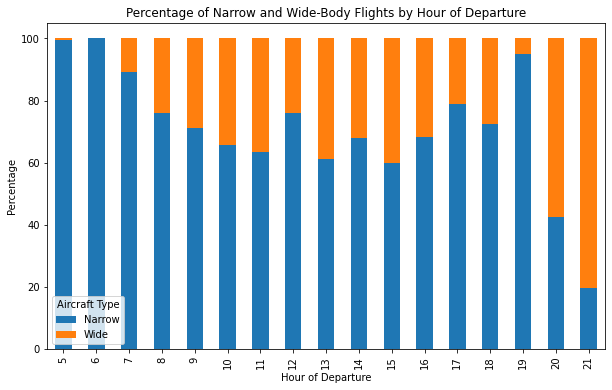

In [187]:
# visualise the wide/narrow body split per hour.

pivot_wb_nb_hour = pd.pivot_table(final_final_pivot_all,index='GMT_PLND_DEP_HOUR'
                                 ,columns='WB_NB_CAT',aggfunc='size',fill_value=0)
pivot_wb_nb_hour['Total'] = pivot_wb_nb_hour['NB'] + pivot_wb_nb_hour['WB']

pivot_wb_nb_hour['Narrow'] = (pivot_wb_nb_hour['NB']/pivot_wb_nb_hour['Total'])*100
pivot_wb_nb_hour['Wide'] = (pivot_wb_nb_hour['WB']/pivot_wb_nb_hour['Total'])*100

ax=pivot_wb_nb_hour[['Narrow','Wide']].plot(kind='bar'
                                           ,stacked=True
                                           ,figsize=(10,6))
# Customize the chart
ax.set_xlabel('Hour of Departure')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Narrow and Wide-Body Flights by Hour of Departure')
plt.legend(title='Aircraft Type')
plt.show()

In [188]:
final_final_pivot_all.head(1)

,Skew_Id,OPERATING_AIRLINE_CD,OPERATING_FLT_NO,GMT_UPLIFT_DT,UPLIFT_STN_CD,DISCHARGE_STN_CD,ACT_DEP_TML_CD,IATA_AC_TYP_CD,ACT_AC_TYP_CD,GMT_PLND_DEP_TIME,COUNTRY_CD,COUNTRY_NM,CORP_GEOG_CTRY_GRP_NM,CORP_GEOG_CONTINENT_NM,WB_NB_CAT,FIRST_SEATS_QTY,CLUB_SEATS_QTY,PREM_ECONOMY_SEATS_QTY,ECONOMY_SEATS_QTY,GMT_UPLIFT_YR,,Gold,Gold For Life,Gold Guest List,Gold Guest List For Life,Premier,Silver,Not eligible,Tier 1,Tier 2,Tier 3,TOTAL_PAX,TOTAL_CAPACITY,LOAD_PERCENTAGE,GMT_PLND_DEP_HOUR
0,2019-03-31103,BA,103,2019-03-31,LHR,YYC,5,788,B8,17:30:00,CA,Canada,CANADA,NORTH AMERICA,WB,0,35,25,154,2019,180,5,3,1,0,0,8,154,1,9,33,197,214,92.056075,17


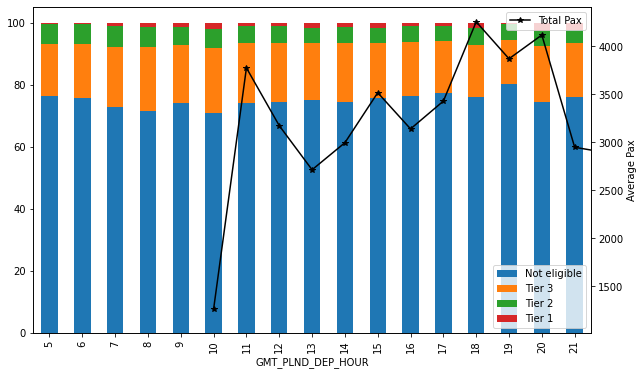

In [203]:
# visualise the tier proportions per hour
fig, ax = plt.subplots(figsize=(10, 6))


tier_list = ['Not eligible','Tier 3','Tier 2','Tier 1']

pivot_tiers_hours = final_final_pivot_all.groupby(['GMT_PLND_DEP_HOUR'])[tier_list].sum()
pivot_tiers_hours['Total'] = pivot_tiers_hours.sum(axis=1)

for tier in tier_list:
    pivot_tiers_hours[f'{tier}'] = (pivot_tiers_hours[tier]/pivot_tiers_hours['Total'])*100
    
ax=pivot_tiers_hours[[f'{tier}' for tier in tier_list]].plot(kind='bar',stacked=True,ax=ax)

# add total pax line
ax2=ax.twinx()

pivot_tiers_hours['Average pax'] = (final_final_pivot_all.groupby(['GMT_PLND_DEP_HOUR'])['TOTAL_PAX'].sum())/len(final_final_pivot_all['GMT_UPLIFT_DT'].unique())
pivot_tiers_hours['Average pax'].plot(kind='line',linestyle='-',color='black',marker='*',ax=ax2,label='Total Pax')

# Customize the line graph
ax2.set_ylabel('Average Pax')
ax2.legend(loc='upper right')
ax.legend(loc='lower right')



plt.show()

In [202]:
pivot_tiers_hours.head(10)

,Not eligible,Tier 3,Tier 2,Tier 1,Total,Average pax
GMT_PLND_DEP_HOUR,,,,,,
5,76.467429,16.710974,6.257720,0.563877,515715,1264.007353
6,75.758718,17.214666,6.518294,0.508322,1540756,3776.362745
7,72.866453,19.113446,6.910557,1.109543,1295308,3174.774510
8,71.469799,20.797335,6.176165,1.556702,1107791,2715.174020
9,73.962057,18.915935,5.647931,1.474077,1222731,2996.889706
10,70.826355,20.859657,6.254790,2.059199,1435364,3518.049020
11,74.142248,19.209860,5.376432,1.271460,1281519,3140.977941
12,74.444687,18.886774,5.454460,1.214079,1399662,3430.544118
13,75.207966,18.250271,4.873084,1.668679,1736703,4256.625000


In [232]:
# EXPORT TO CSV
# final_final_pivot_all.to_csv('../../final_final_pivot_all.csv')

### Linear Regression

### Compare by Year

In [83]:
# columns that you want to group by
list_groupby = ['GMT_UPLIFT_YR']

# grouping by OPERATING_FLT_NO, DISCHARGE_STN_CD and Lounge_eligibility_tier
df_groupby_year_ttl = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count_ttl = ('pax','sum')
).reset_index()

# a look at the data
df_groupby_year_ttl

,GMT_UPLIFT_YR,pax_count_ttl
0,2019,10975714
1,2023,9737126


In [84]:
df_groupby_year = pd.merge(df_groupby_year,
                            df_groupby_year_ttl,
                            on = ['GMT_UPLIFT_YR'],
                            how = 'left'
                           )

df_groupby_year

,GMT_UPLIFT_YR,Lounge_eligibility_tier,pax_count,pax_count_ttl
0,2019,Not eligible,8147159,10975714
1,2019,Tier 1,196564,10975714
2,2019,Tier 2,635765,10975714
3,2019,Tier 3,1996226,10975714
4,2023,Not eligible,7372440,9737126
5,2023,Tier 1,93555,9737126
6,2023,Tier 2,501044,9737126
7,2023,Tier 3,1770087,9737126


In [85]:
# getting the percentage of pax elegible for each of the Tiers

df_groupby_year['pax_eligible%'] = (df_groupby_year['pax_count'] / df_groupby_year['pax_count_ttl'] )*100 

# getting the pax_elegible% column in the right format
df_groupby_year['pax_eligible%'] = df_groupby_year['pax_eligible%'].map('{:,.1f}%'.format)

# dropping pax_count, pax_count_ttl columns - not needed anymore
df_groupby_year.drop(columns=['pax_count','pax_count_ttl'],inplace = True)

In [86]:
df_groupby_year = df_groupby_year[df_groupby_year['Lounge_eligibility_tier'] != "Not eligible"]



,GMT_UPLIFT_YR,Lounge_eligibility_tier,pax_eligible%
1,2019,Tier 1,1.8%
2,2019,Tier 2,5.8%
3,2019,Tier 3,18.2%
5,2023,Tier 1,1.0%
6,2023,Tier 2,5.1%
7,2023,Tier 3,18.2%


Not much difference

### Compare by location and year

In [88]:
# columns that you want to group by
list_groupby = ['CORP_GEOG_CONTINENT_NM','CORP_GEOG_CTRY_GRP_NM','GMT_UPLIFT_YR','Lounge_eligibility_tier']

# grouping by OPERATING_FLT_NO, DISCHARGE_STN_CD and Lounge_eligibility_tier
df_groupby_country_group_year = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count = ('pax','sum')
).reset_index()

list_groupby = ['CORP_GEOG_CONTINENT_NM','CORP_GEOG_CTRY_GRP_NM','GMT_UPLIFT_YR']

df_groupby_country_group_year_ttl = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count_ttl = ('pax','sum')
).reset_index()

df_groupby_country_group_year = pd.merge(df_groupby_country_group_year,
                                         df_groupby_country_group_year_ttl,
                                         on = list_groupby,
                                         how = "left")

df_groupby_country_group_year = df_groupby_country_group_year[df_groupby_country_group_year['Lounge_eligibility_tier'] != 'Not eligible']

df_groupby_country_group_year['pax_eligible%'] = (df_groupby_country_group_year['pax_count'] / df_groupby_country_group_year['pax_count_ttl'] )*100 

# getting the pax_elegible% column in the right format
df_groupby_country_group_year['pax_eligible%'] = df_groupby_country_group_year['pax_eligible%'].map('{:,.1f}%'.format)

# dropping pax_count, pax_count_ttl columns - not needed anymore
df_groupby_country_group_year.drop(columns=['pax_count','pax_count_ttl'],inplace = True)

df_groupby_country_group_year.head(6)


,CORP_GEOG_CONTINENT_NM,CORP_GEOG_CTRY_GRP_NM,GMT_UPLIFT_YR,Lounge_eligibility_tier,pax_eligible%
1,AFRICA,EAST AND CENTRAL AFRICA,2019,Tier 1,3.7%
2,AFRICA,EAST AND CENTRAL AFRICA,2019,Tier 2,4.0%
3,AFRICA,EAST AND CENTRAL AFRICA,2019,Tier 3,17.6%
5,AFRICA,EAST AND CENTRAL AFRICA,2023,Tier 1,0.2%
6,AFRICA,EAST AND CENTRAL AFRICA,2023,Tier 2,4.3%
7,AFRICA,EAST AND CENTRAL AFRICA,2023,Tier 3,16.0%


In [89]:
df_groupby_country_group_year = df_groupby_country_group_year.set_index(['CORP_GEOG_CONTINENT_NM','CORP_GEOG_CTRY_GRP_NM','GMT_UPLIFT_YR','Lounge_eligibility_tier'],drop = True).unstack('Lounge_eligibility_tier')

df_groupby_country_group_year

pax_eligible%  \
Lounge_eligibility_tier                                                  Tier 1   
CORP_GEOG_CONTINENT_NM      CORP_GEOG_CTRY_GRP_NM   GMT_UPLIFT_YR                 
AFRICA                      EAST AND CENTRAL AFRICA 2019                   3.7%   
                                                    2023                   0.2%   
                            NORTH AFRICA            2019                   0.5%   
                                                    2023                   0.3%   
                            SOUTHERN AFRICA         2019                   3.8%   
                                                    2023                   2.4%   
                            WEST AFRICA             2019                   3.7%   
                                                    2023                   2.3%   
ASIA FAR EAST               CHINA                   2019                   4.6%   
                                                    2023                   0.2%   
                            FAR EAST HUBS           2019                   3.8%   
                                                    2023                   1.4%   
                            FAR EAST OTHER          2019                   0.4%   
                            JAPAN                   2019                   3.5%   
                                                    2023                   1.0%   
ASIA SOUTH EAST AND CENTRAL SOUTH ASIA              2019                   2.8%   
                                                    2023                   0.4%   
AUSTRALASIA PACIFIC         FAR EAST JSA HUBS       2019                   2.3%   
                                                    2023                   3.4%   
EUROPE EXC UK               BENELUX                 2019                   0.7%   
                                                    2023                   0.5%   
                            EASTERN EUROPE          2019                   0.5%   
                                                    2023                   0.2%   
                            IRELAND RO              2019                   0.6%   
                                                    2023                   0.6%   
                            MEDITERRANEAN           2019                   0.7%   
                                                    2023                   0.3%   
                            SCANDINAVIA             2019                   0.6%   
                                                    2023                   0.4%   
                            WEST EUROPE             2019                   0.5%   
                                                    2023                   0.4%   
MIDDLE EAST                 MIDDLE EAST OTHER       2019                   0.3%   
                                                    2023                   0.1%   
                            NORTHERN GULF           2019                   5.0%   
                                                    2023                   3.0%   
                            SAUDI ARABIA            2019                   4.0%   
                                                    2023                   3.5%   
                            SOUTHERN GULF           2019                   4.8%   
                                                    2023                   3.6%   
NORTH AMERICA               CANADA                  2019                   2.3%   
                                                    2023                   0.2%   
                            NORTH AMERICA OTHER     2023                   3.6%   
                            USA                     2019                   4.3%   
                                                    2023                   2.4%   
SOUTH AMERICA INC CARIBBEAN CARIBBEAN               2019                    NaN   
                                                    2023                   2.7%   

### By continent

In [90]:
# columns that you want to group by
list_groupby = ['CORP_GEOG_CONTINENT_NM','GMT_UPLIFT_YR','Lounge_eligibility_tier']

# grouping by OPERATING_FLT_NO, DISCHARGE_STN_CD and Lounge_eligibility_tier
df_groupby_cont_year = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count = ('pax','sum')
).reset_index()

list_groupby = ['CORP_GEOG_CONTINENT_NM','GMT_UPLIFT_YR']

df_groupby_cont_year_ttl = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                pax_count_ttl = ('pax','sum')
).reset_index()

df_groupby_cont_year = pd.merge(df_groupby_cont_year,
                                df_groupby_cont_year_ttl,
                                on = list_groupby,
                                how = "left")

df_groupby_cont_year = df_groupby_cont_year[df_groupby_cont_year['Lounge_eligibility_tier'] != 'Not eligible']

df_groupby_cont_year['pax_eligible%'] = (df_groupby_cont_year['pax_count'] / df_groupby_cont_year['pax_count_ttl'] )*100 

# getting the pax_elegible% column in the right format
df_groupby_cont_year['pax_eligible%'] = df_groupby_cont_year['pax_eligible%'].map('{:,.1f}%'.format)

# dropping pax_count, pax_count_ttl columns - not needed anymore
df_groupby_cont_year.drop(columns=['pax_count','pax_count_ttl'],inplace = True)

df_groupby_cont_year.head(6)

,CORP_GEOG_CONTINENT_NM,GMT_UPLIFT_YR,Lounge_eligibility_tier,pax_eligible%
1,AFRICA,2019,Tier 1,3.5%
2,AFRICA,2019,Tier 2,4.8%
3,AFRICA,2019,Tier 3,18.5%
5,AFRICA,2023,Tier 1,1.7%
6,AFRICA,2023,Tier 2,4.3%
7,AFRICA,2023,Tier 3,18.2%


In [91]:
df_groupby_cont_year = df_groupby_cont_year.set_index(['CORP_GEOG_CONTINENT_NM','GMT_UPLIFT_YR','Lounge_eligibility_tier'],drop = True).unstack('Lounge_eligibility_tier')

df_groupby_cont_year

pax_eligible%              
Lounge_eligibility_tier                          Tier 1 Tier 2 Tier 3
CORP_GEOG_CONTINENT_NM      GMT_UPLIFT_YR                            
AFRICA                      2019                   3.5%   4.8%  18.5%
                            2023                   1.7%   4.3%  18.2%
ASIA FAR EAST               2019                   3.6%   4.8%  18.3%
                            2023                   1.0%   3.5%  18.3%
ASIA SOUTH EAST AND CENTRAL 2019                   2.8%   4.0%  19.1%
                            2023                   0.4%   3.0%  17.0%
AUSTRALASIA PACIFIC         2019                   2.3%   5.6%  18.3%
                            2023                   3.4%   7.4%  26.3%
EUROPE EXC UK               2019                   0.6%   6.4%  17.1%
                            2023                   0.4%   5.5%  18.1%
MIDDLE EAST                 2019                   4.0%   6.0%  20.2%
                            2023                   3.1%   5.0%  18.8%
NORTH AMERICA               2019                   4.1%   5.2%  20.5%
                            2023                   2.3%   5.1%  19.2%
SOUTH AMERICA INC CARIBBEAN 2019                   2.4%   3.6%  17.4%
                            2023                   1.5%   3.1%  17.3%
UK                          2019                   0.4%   5.7%  18.1%
                            2023                   0.4%   5.0%  16.8%

### By aircraft

In [92]:
list_groupby = ['IATA_AC_TYP_CD','ACT_AC_TYP_CD','FIRST_SEATS_QTY','CLUB_SEATS_QTY','PREM_ECONOMY_SEATS_QTY','ECONOMY_SEATS_QTY','Lounge_eligibility_tier']

# grouping by OPERATING_FLT_NO, DISCHARGE_STN_CD and Lounge_eligibility_tier
df_groupby_acft = df_lounge_elig_flight_info_country_acft_typ.groupby(list_groupby).agg(
                mean_pax_count = ('pax','mean')).reset_index()

df_groupby_acft['mean_pax_count'] = df_groupby_acft['mean_pax_count'].map('{:,.1f}'.format)

df_groupby_acft = df_groupby_acft[df_groupby_acft['Lounge_eligibility_tier'] != 'Not eligible']

df_groupby_acft = df_groupby_acft.set_index(list_groupby,drop = True).unstack('Lounge_eligibility_tier')

df_groupby_acft.fillna(0, inplace=True)

df_groupby_acft


mean_pax_count  \
Lounge_eligibility_tier                                                                                      Tier 1   
IATA_AC_TYP_CD ACT_AC_TYP_CD FIRST_SEATS_QTY CLUB_SEATS_QTY PREM_ECONOMY_SEATS_QTY ECONOMY_SEATS_QTY                  
319            A4            0.0             16.0           0.0                    119.0                        1.2   
               M4            0.0             21.0           0.0                    113.0                        1.1   
320            A3            0.0             24.0           0.0                    132.0                        1.2   
               E9            0.0             29.0           0.0                    130.0                        1.2   
               M2            0.0             24.0           0.0                    144.0                        1.1   
               R3            0.0             28.0           0.0                    139.0                        1.2   
               T3            0.0             26.0           0.0                    142.0                        1.2   
321            M6            0.0             23.0           0.0                    131.0                        1.3   
               V6            0.0             38.0           0.0                    160.0                        1.2   
               W6            0.0             42.0           0.0                    154.0                        1.3   
32A            H3            0.0             20.0           0.0                    150.0                        1.2   
32N            N3            0.0             20.0           0.0                    150.0                        1.2   
32Q            N6            0.0             32.0           0.0                    172.0                        1.2   
332            W9            0.0             30.0           21.0                   235.0                        1.0   
339            W9            0.0             30.0           21.0                   234.0                        1.1   
343            W9            0.0             45.0           0.0                    212.0                        1.3   
351            K5            0.0             56.0           56.0                   219.0                        1.3   
388            A8            14.0            97.0           55.0                   303.0                        2.2   
744            S4            14.0            86.0           30.0                   145.0                        2.1   
               V4            14.0            52.0           36.0                   235.0                        2.1   
777            D7            0.0             48.0           40.0                   184.0                        1.3   
               J7            0.0             32.0           48.0                   252.0                          0   
               K7            0.0             48.0           24.0                   203.0                          0   
               L7            0.0             48.0           24.0                   203.0                        1.3   
               M7            7.0             50.0           40.0                   138.0                        1.6   
               P7            17.0            48.0           24.0                   127.0                        2.1   
               R7            10.0            52.0           40.0                   134.0                        1.7   
               V7            14.0            48.0           40.0                   124.0                        2.1   
               W7            12.0            48.0           32.0                   127.0                        2.0   
77W            F7            8.0             76.0           40.0                   130.0                        1.7   
               G7            14.0            56.0           44.0                   183.0                        2.1   
781            X8            7.0             49.0      

<br><br><br>

In [93]:
#--------------------------------
#
# Your turn!!!
#
#--------------------------------

<u>What level of granularity do you use?</u>
- ... (your answer here)

<u>What metric do you use to come up with Lounge eligibility profiles?</u>
- ... (your answer here)

In [ ]:
# your code here

<br>

Please save your final lookup table below in the form of a pandas dataframe. It must contain the categories you have come up with as rows, and the Tier 1, Tier 2, and Tier 3 percentage of costumers as columns.